# references
## Q1 
### details t-test https://www.w3schools.com/statistics/statistics_hypothesis_testing_mean_left.php
### for calculating the critical value  https://statisticsbyjim.com/hypothesis-testing/z-table/
## Q2
### apply function in pandas https://www.geeksforgeeks.org/python-pandas-apply/
### https://www.pythonfordatascience.org/chi-square-test-of-independence-python/
### CHI-SQUARE TABLE https://math.arizona.edu/~jwatkins/chi-square-table.pdf
### calculating CI https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
## Q3
### https://stackoverflow.com/questions/49554139/boxplot-of-multiple-columns-of-a-pandas-dataframe-on-the-same-figure-seaborn
### https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

In [1]:
# importing python libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as stats

## Q1

1. Load the dataset Q1.csv. It contains the exam scores (in percentages) of a sample of 50 students
from a Dublin secondary school.
    - a) Find and comment on important summary statistics and produce an appropriate plot to
    summarise the dataset.
    - b) One of the teachers is concerned about the performance of the students in the school. She
    suspects that their performance may be below the reported national average of 70%. Does
    the data show that her concerns are justified? Use a significance level of alpha = 0.05.
    - c) Produce and comment on an appropriate plot to illustrate your findings. 


In [2]:
df = pd.read_csv("Q1.csv")

### Q1.A)

#### Summary Statistics
    - central tendency (mean, median) 
        - the class average is a little below 69, mean = 68.73
        - half of the class is below 68.39, meadian = 68.39
    - spread (range, standard deviation).
        - most of the student's grades are between 62.0 and 74.6
        - standard deviation = 9.75
    - skewness 
        the histogram plot in section C helps us visualize that the distribution seems mostly centralized into one mean but with indication of some outliers students with skew the distributiion to the right
    - outliers
        - Is noticiable a group of 9 students that are way above the average with scores over 80
        - Is noticiable a group of 9 student that are way below the average with scores below 60

In [3]:
df.describe()

,exam_score
count,50.000000
mean,68.735600
std,9.750143
min,48.730000
25%,62.040000
50%,68.390000
75%,74.630000
max,87.360000


### Q1.B)

#### We are interested in investigating if the mean parameter of the distribution of grades of the school is less than the reported national average of 70%.  
    - This falls in the framework on testing a statistical hypothesis. (a left tailed one sample test)
    - Following the general steps in testin statistical hypothesis : [slides class 9]
        1. State the Null Hypothesis, H_0 and the Alternative Hypothesis
        2. Select a suitable test and find the critifical value in order to define the rejection region
        3. Calculate a test statistic from the data collected
        4. Make hypothesis decision
        5. Summarise results

##### 1. a one-sample left-tailed test.
The null hypothesis:

$ H_0 $ : $ \mu = 70 $ 

against

$ H_1 $ : $ \mu < 70 $

##### 2. We need to choosen between a z-test and a t-test. 
    - z-test is used when sigma is known or when the sample is large enough.
    - the t-test is used when sigma is unkown and/or when the sample is small
    - Assuming the classroom is the whole population we know the standard deviation σ
    - based on this scenario I will use a z-test for the analysis
    - calculating critifical value for alpha = 0.05 
    - we can find the critical z-value from a standard normal distribution table
    - I used https://statisticsbyjim.com/hypothesis-testing/z-table/
    - I found the criticial value of -1.65


#### 3. Calculate a test statistic from the data collected
$ z = \frac{\bar{x} - \mu_{national}}{\frac{\sigma}{\sqrt{n}}} $



In [4]:
x_mean = df.mean()
mu_national = 70
sigma_classroom = df.std()
n_sqrt = math.sqrt(len(df))

z = (x_mean - mu_national)/(sigma_classroom/n_sqrt)
print(z)

exam_score   -0.916977
dtype: float64


#### 4. Make hypothesis decision
    - The calculated z critical value was -1.65
    - The calculated z test statistic was -0.916
    - Since the z test statistic falls in the rejection region, we can reject the null Hypothesis

#### 5. Summarize Results
There is enough evidence to support the claim that the classroom average is below the national average of 70.
The data show evidence to justify the concerns of the teacher.

### Q1.C)

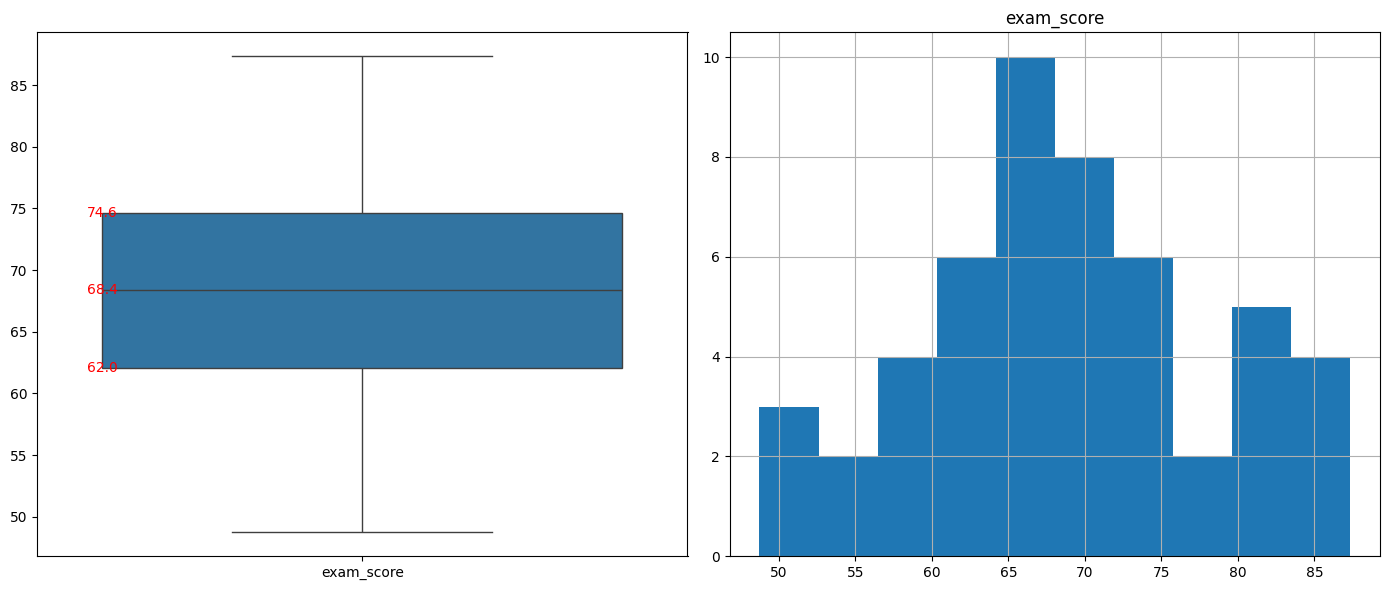

In [5]:
# Plotting the data boxplot and histogram  together in two subplots

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Adjust figsize as needed

# Calculate the quantiles and plot the boxplot and histogram
quantiles = np.percentile(df, [25, 50, 75], axis=0)
sns.boxplot(data=df, ax=axes[0])
df.hist(bins=10, ax=axes[1])


# Loop through the quantiles list and write then as a text in the plot
for i, q in enumerate(quantiles):
    rounded_q = round(q[0],1)
    axes[0].text(x=-0.4, y=q, s=f'{rounded_q}', horizontalalignment='center', verticalalignment='center', 
                 fontsize=10, color='red')



# Adjust and show the two plots
plt.tight_layout()
plt.show()

## Q2

2. Load the diamonds dataset, and print the first 5 rows.
   - The color variable refers to the colour of the diamond, with categories from “D” to “J”.
   - Colourless diamonds are considered better than diamonds with a yellow tint.
   - Diamonds from “D” to “F” are considered colourless, and diamonds from colour “G” to “J” are not considered colourless (that is, they have a very faint colour).
   - a. Create a new binary variable in the dataframe called “colourless” which records 1 in rows
    with colourless diamonds and 0 otherwise.
   - b. Perform an appropriate hypothesis test to determine whether there is any association
    between the clarity of a diamond and whether it is colourless or not. Use a significance
    level of alpha = 0.01.
   - c. Produce and comment on an appropriate plot to illustrate your findings.
   - d. Find and interpret 90% confidence intervals for both the mean price of colourless diamonds
    and the mean price of non-colourless diamonds. 


In [6]:
df = pd.read_csv("diamonds.csv")

In [7]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [9]:
df["clarity"].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

### Q2.A 

#### To create a binary value we need to map the letters to 1 if is colorless and 0 otherwise
    - "D", "E", "F" are considered colorless
    - "G", "H", "I", "J" are considered colorful
    - for that we apply a function in the pandas "color" column

In [10]:
def convert_to_colorless(color):
    if color == "D" or color == "E" or color == "F":
        return 1
    else:
        return 0
df["colorless"] = df["color"].apply(convert_to_colorless)

### Q2.B

#### Both colorless and clarity are categorical variables. So we are interested in testing if there are significant association between their values. We could use the Chi-Square test of independence for that.
    - This again falls in the framework on testing a statistical hypothesis.
    - Following the general steps in testing statistical hypothesis :
        1. State the Null Hypothesis, H_0 and the Alternative Hypothesis
        2. Select a suitable test and find the critifical value in order to define the rejection region
        3. Calculate a test statistic from the data collected
        4. Make hypothesis decision
        5. Summarise results

#### 1. A Chi-Square test of independence
The null hypothesis:

$ H_0 : $ there is no association between the clarity of a diamond

against

$ H_1 : $ there is association between the clarity of a diamond and if it is colorless

#### 2.Finding the critical value

To establish the critical value for an alpha = 0.01 we need to calculate the degree of freedom of the distribution which is the product of unique independent values in each category. It is nothing more than the number of unique values minus 1
for the colorless column we have (2 - 1) unique independent values
for the clarity column we have (8 - 1) unique independent values
$ df = (1) * (7) = 7$ and $ \alpha = 0.01 $

- looking on the chi square table for 7 degrees of freedom and alpha 0.01 https://math.arizona.edu/~jwatkins/chi-square-table.pdf
- I found the critical value 18.475
- We would reject $ H_0 $ if our statistic is greater than 18.475


#### 3. Calculating the test statistic
Calculating the X_squared test statistic involves calculating the pairwise ocurrence for each pair of values
for the combination of the two columns. This is represented as a contigency table.
We can use the crosstab function in pandas that take the two columns as input and calculate their pairwise frequencies.
For calculating the X_squared statistic we can feed the frequencies tables to the scipy chi2_contigency function which calculates the expected probabilities, the X_squared statistic and the p-value of the statistic (which is different from our critical value p-value).

$ \chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}} $

where i and j are for each row and column of values in the contigency table.
$ O_{ij} $ is the frequencies observed in dataset and $ E_{ij} $ is the expected frequency under the $ H_0 $ Assumption

In [11]:
contigency_table = pd.crosstab(df["clarity"],df["colorless"])

In [12]:
contigency_table

colorless,0,1
clarity,,
I1,454,287
IF,1174,616
SI1,6425,6640
SI2,4502,4692
VS1,4821,3350
VS2,5890,6368
VVS1,2013,1642
VVS2,2547,2519


In [13]:
X_squared_statistic, pvalue, dof, expected = stats.chi2_contingency(contigency_table)
print(X_squared_statistic, pvalue)

486.47305941485223 6.481587124454715e-101


#### 4. Make hypothesis decision
    - The calculated critical value was 18.475
    - The calculated Chi squared statistic was 486.47
    - Since the Chi squared statistic falls in the rejection region, we can reject the null Hypothesis
    - It is noticiable that the value of the statistic is very high, we indicates a very confident rejection of the null hypothesis

#### 5. Summary of results
From the evidence of the test hypothesis we can confidently reject $ H_0 $ that there is no association between the clarity of a diamond

### Q2.C

The intuition is to show that for most of the clarity categories there are a
disproportion in the colorless/colorful values.

The stacked bar in percentages is a good visualization for that since it sums up to 100% for each category enabling it to easily compare the proportions across the clarity categories.

The stacked bar helps us to visualize that:
    - the less clear clarity group ("I1" and "If") have higher percentages of Colorless diamond
    - SI1 , SI2 and VS2 have proportions close to 50%
    - VS1 and VVS1 also have higher percentages of Colorless diamonds but not as high as the less clear clarity group

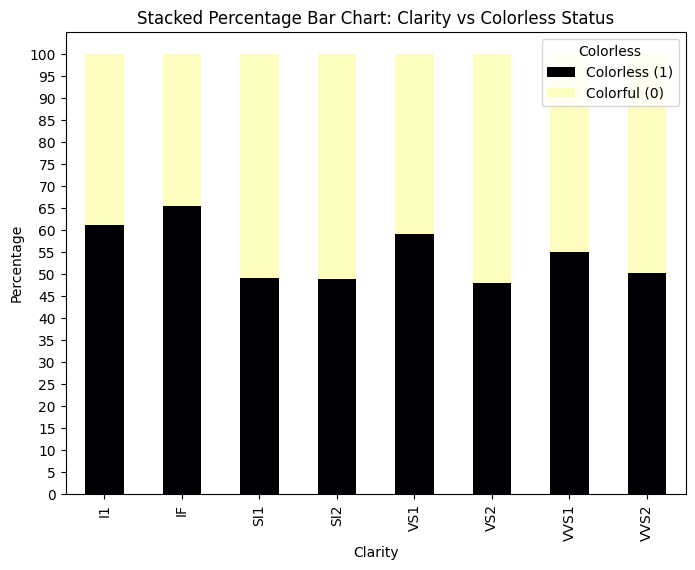

In [14]:
# Plot the stacked bar chart
# Calculate row percentages
row_totals = contigency_table.sum(axis=1)  # Sum of each row
percentage_table = contigency_table.div(row_totals, axis=0) * 100  # Convert to percentages

percentage_table.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='magma')
plt.title('Stacked Percentage Bar Chart: Clarity vs Colorless Status')
plt.xlabel('Clarity')
plt.ylabel('Percentage')
plt.legend(title='Colorless', labels=['Colorless (1)', 'Colorful (0)'])
plt.yticks(range(0, 105, 5))
plt.show()


### Q2.D

The Confidence Interval is a measure of the sample that tells an interval of values in which our target statistic is likely to be in with certain probability.

Using the scipy t-distribution interval

After calculating the CI for both groups (colorless, colorful) we have evidence that the mean price of colorless diamonds are lower than the colorful diamonds:
    - CI for colorful mean price : (4448.778068284649, 4533.682076903305)
    - CI for colorless mean price : (3293.937840660912, 3381.580961514166)

In [15]:
colorful_df = df[df["colorless"] == 0]
n_colorful = len(colorful_df)
colorful_mean = colorful_df["price"].mean()
colorful_std = colorful_df["price"].std()
colorful_SE = colorful_std/math.sqrt(n_colorful)

colorless_df = df[df["colorless"] == 1]
n_colorless = len(colorless_df)
colorless_mean = colorless_df["price"].mean()
colorless_std = colorless_df["price"].std()
colorless_SE = colorful_std/math.sqrt(n_colorless)

print("mean price for colorful diamonds",colorful_mean)
print("mean price for colorless diamonds",colorless_mean)

mean price for colorful diamonds 4491.230072593977
mean price for colorless diamonds 3337.759401087539


In [16]:
CI_colorful = stats.t.interval(0.90, n_colorful-1, loc=colorful_mean, scale=colorful_SE)
print("CI for colorful mean price :",CI_colorful)
CI_colorless = stats.t.interval(0.90, n_colorless-1, loc=colorless_mean, scale=colorless_SE)
print("CI for colorless mean price :",CI_colorless)

CI for colorful mean price : (4448.778068284649, 4533.682076903305)
CI for colorless mean price : (3293.937840660912, 3381.580961514166)


## Q3

3. Load the PlantGrowth dataset from the pydataset library.
    -It contains the results of a small study comparing the yields of plants obtained under a control and under two different treatment
conditions.
    - a. Find and comment on important summary statistics by treatment and produce an appropriate plot to summarise the dataset.
    - b. Conduct an appropriate hypothesis test to see if there is evidence of a difference between the three means (that is, the control and the two treatments). Use a significance level of alpha = 0.05.
    - c. If there is evidence of a difference between the three means, find and comment on where this difference may be.

In [17]:
from pydataset import data

plant_growth_df = data('PlantGrowth')
print("loading dataset")

loading dataset


In [18]:
print(plant_growth_df.columns)

Index(['weight', 'group'], dtype='object')


In [19]:
plant_growth_df['group'].value_counts()

group
ctrl    10
trt1    10
trt2    10
Name: count, dtype: int64

### Q3.A

In [20]:
group_ctrl_df = plant_growth_df[ plant_growth_df['group'] == "ctrl"]
group_trt1_df = plant_growth_df[ plant_growth_df['group'] == "trt1"]
group_trt2_df = plant_growth_df[ plant_growth_df['group'] == "trt2"]

In [21]:
summary_table = pd.concat([group_ctrl_df.describe(),group_trt1_df.describe(),group_trt2_df.describe()],axis=1)
summary_table.columns = ["ctrl","trt1","trt2"]
print(summary_table)

            ctrl       trt1       trt2
count  10.000000  10.000000  10.000000
mean    5.032000   4.661000   5.526000
std     0.583091   0.793676   0.442573
min     4.170000   3.590000   4.920000
25%     4.550000   4.207500   5.267500
50%     5.155000   4.550000   5.435000
75%     5.292500   4.870000   5.735000
max     6.110000   6.030000   6.310000


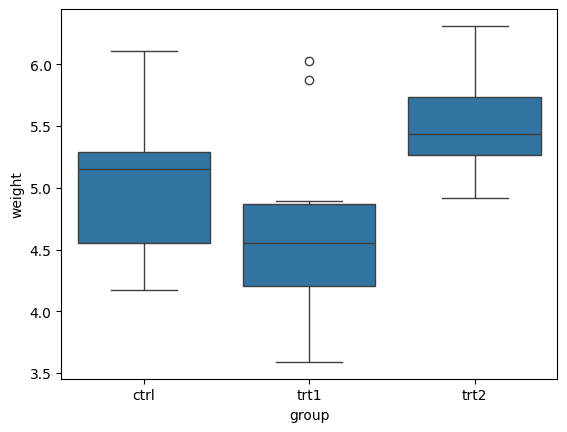

In [22]:
sns.boxplot(x="group", y="weight", data=plant_growth_df)
plt.show()


##### Find and comment on important summary statistics by treatment and produce an appropriate plot to summarise the dataset.

- Treament 1 seems to have reduced the mean and median weight (4.66 and 4.55) of the plants in comparison both to the control group (5.032000 and 5.155000) and treatment2 (5.526000 and 5.435000).
- Treatment 2 seems to have 2 outliers which results in a much higher standard deviaton than the control group and the treatment 2.
- Treament 2 seems to have increased the mean and median weight(5.526000 and 5.435000) in comparison to the control group (5.032000 and 5.155000).
- Treament 2 also has a lower standard deviation than the other two groups.


### Q3.B

#### To test the hypothesis that the three groups have significant differents in their mean, involves testing :
    - Following the general steps in testing statistical hypothesis :
        1. State the Null Hypothesis, H_0 and the Alternative Hypothesis
        2. Select a suitable test and find the critifical value in order to define the rejection region
        3. Calculate a test statistic from the data collected
        4. Make hypothesis decision
        5. Summarise results


1. The null hypothesis:

$ H_0 : $ the three groups have the same population mean

against

$ H_1 : $ there is difference in the population mean of at least one group.


2. The recommended test for this scenario is the one-way ANOVA tests
Here since the calculation of the Critical Value is a little bit more complicated involving a F-distribution
we can rely on the calculation of the p-value using scipy and compare the calculated p-value with the alpha.

3. Calculate a test statistic from the data collected

In [23]:
statistic, pvalue = stats.f_oneway(group_ctrl_df["weight"],group_trt1_df["weight"],group_trt2_df["weight"])
print(statistic, pvalue)

4.846087862380136 0.0159099583256229


4. Make the hypothesis decision
Since the p-value (0.0159) is less than α (0.05), we can reject $ H_0 $

5. Summarise results

From the evidence of the test hypothesis we can reject $ H_0 $ that all the groups have the same populaion mean

### Q3.C

## Q4

4. Load the trees dataset from the pydataset library.
   It contains measurements of the diameter, height and volume of timber in 31 felled black cherry trees.
   Note that the diameter (in inches) is labelled girth in the dataset.
   It is measured at 4 foot 6 inches above the ground.
   -  a. Perform a correlation analysis between all numerical variables. Include and comment on the results of hypothesis tests for the population correlation coefficients between all three pairs of variables (you can use the pearsonr function from the scipy.stats library).
   - b. There is interest in estimating the volume of timber from trees using either the girth or the
height of the trees, or both. Perform a regression analysis to decide which of the three possible models you would recommend using. Interpret your results and provide a short conclusion of your findings.


In [24]:
from pydataset import data
trees_df = data('trees')
print("loading dataset")

loading dataset


In [25]:
trees_df.corr()


,Girth,Height,Volume
Girth,1.000000,0.51928,0.967119
Height,0.519280,1.00000,0.598250
Volume,0.967119,0.59825,1.000000


In [27]:
# Calculate Pearson correlation coefficients and p-values for each pair of variables
girth_height_corr, girth_height_pval = stats.pearsonr(trees_df['Girth'], trees_df['Height'])
girth_volume_corr, girth_volume_pval = stats.pearsonr(trees_df['Girth'], trees_df['Volume'])
height_volume_corr, height_volume_pval = stats.pearsonr(trees_df['Height'], trees_df['Volume'])

In [28]:
print(girth_height_corr, girth_height_pval)
print(girth_volume_corr, girth_volume_pval)
print(height_volume_corr, height_volume_pval)

0.5192800719499371 0.002757814793057685
0.9671193682556305 8.6443342117705775e-19
0.5982496519917823 0.00037838234791848544
